In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Fetching Data

In [2]:
train_set = pd.read_csv("train.csv",delimiter=",")
test_set = pd.read_csv("test.csv",delimiter=",")
print('training set size : ', train_set.shape, '\ntest set size : ', test_set.shape)

training set size :  (20758, 18) 
test set size :  (13840, 17)


# Data Mining
## Data Overview

In [3]:
train_set.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
train_set.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
train_set.describe(include=['object', 'bool'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


### Summary

| Features      | Description | Variable | Type |
|--------------|----------|----------|----------|
| id       | Identifier        | Numerical | int |
| Gender      | Gender        | Categorical | object |
| Age      | Age        | Numerical | float |
| Height     | Height     | Numerical | float |
| Weight      | Weight     | Numerical | float |
| family_history_with_overweight   | family member suffered or suffers from overweight        | Categorical | object |
| FAVC      | Frequent consumption of high caloric food     | Categorical | object |
| FCVC      | Frequency of consumption of vegetables     | Numerical | float |
| NCP      | Number of main meals     | Numerical | float |
| CAEC      | Consumption of food between meals     | Categorical | object |
| SMOKE      | Smoker or not     | Categorical | object |
| CH2O      | Consumption of water daily     | Numerical | float|
| SCC      | Calories consumption monitoring     | Categorical | object |
| FAF      | Physical activity frequency     | Numerical | float |
| TUE      | Time using technology devices     | Numerical | float |
| CALC      | Consumption of alcohol     | Categorical | object |
| MTRANS      | Transportation used     | Categorical | object |
| NObeyesdad      | Obesity level deducted     | Categorical | object |

In [7]:
train_set.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [8]:
train_set.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Univariate analysis

### Distribution of the Numerical Variables

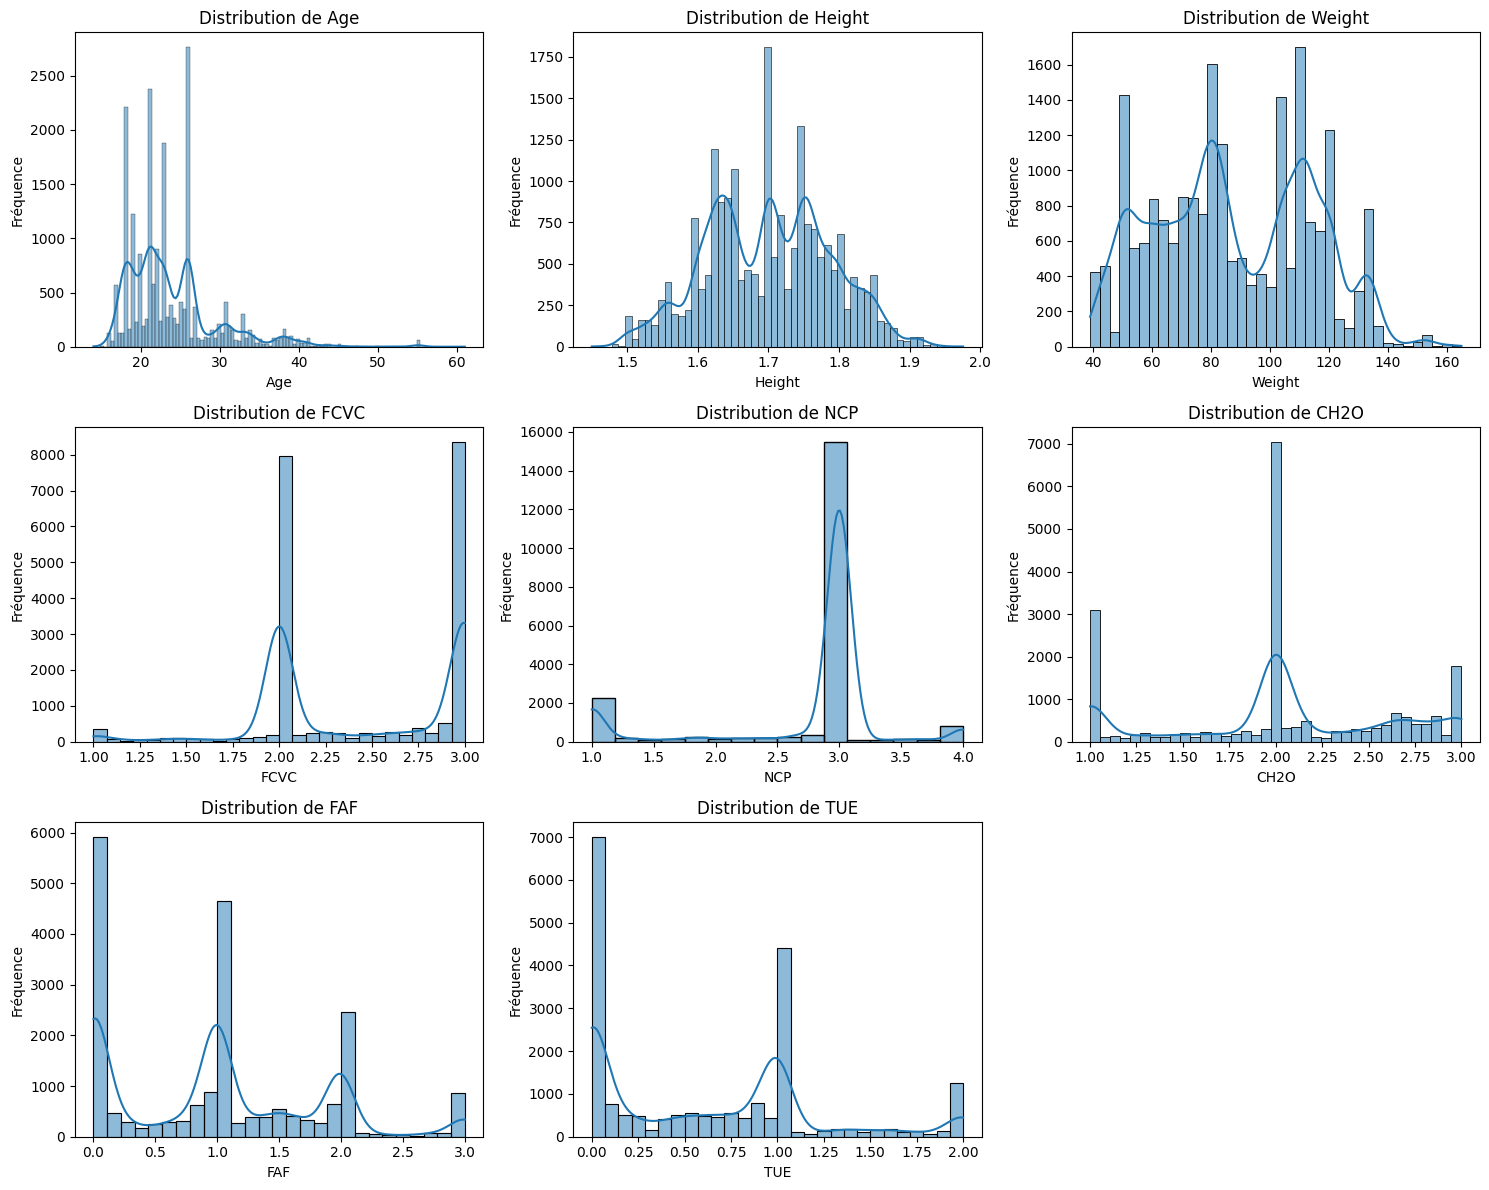

In [9]:
train_set.drop('id', axis=1, inplace=True)
num_cols = train_set.select_dtypes(include=['int', 'float']).columns
num_plots = len(num_cols)
n_cols = 3
n_rows = num_plots // n_cols + (num_plots % n_cols > 0) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows)) 

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train_set[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Distribution of the Categorical Variables

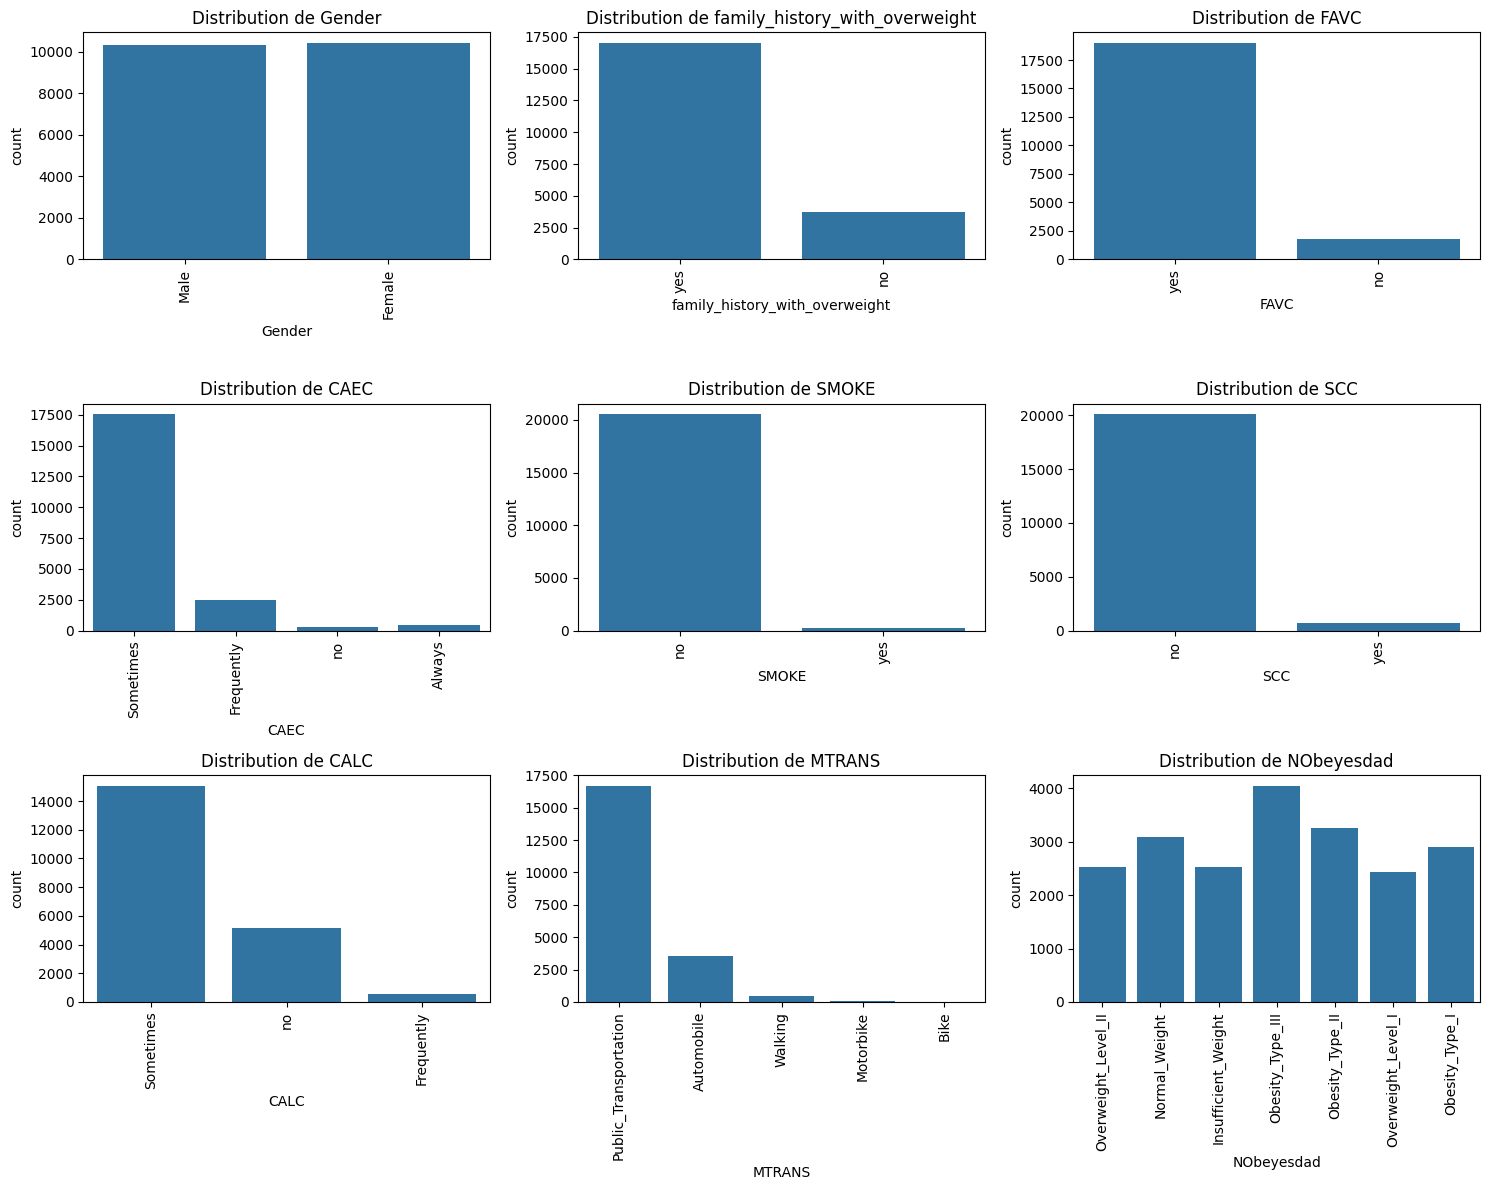

In [10]:
cat_cols = train_set.select_dtypes(include=['object', 'bool']).columns
num_plots = len(cat_cols)
n_cols = 3 
n_rows = num_plots // n_cols + (num_plots % n_cols > 0)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=train_set[col], ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].tick_params(axis='x', rotation=90) 

for j in range(i+1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: >

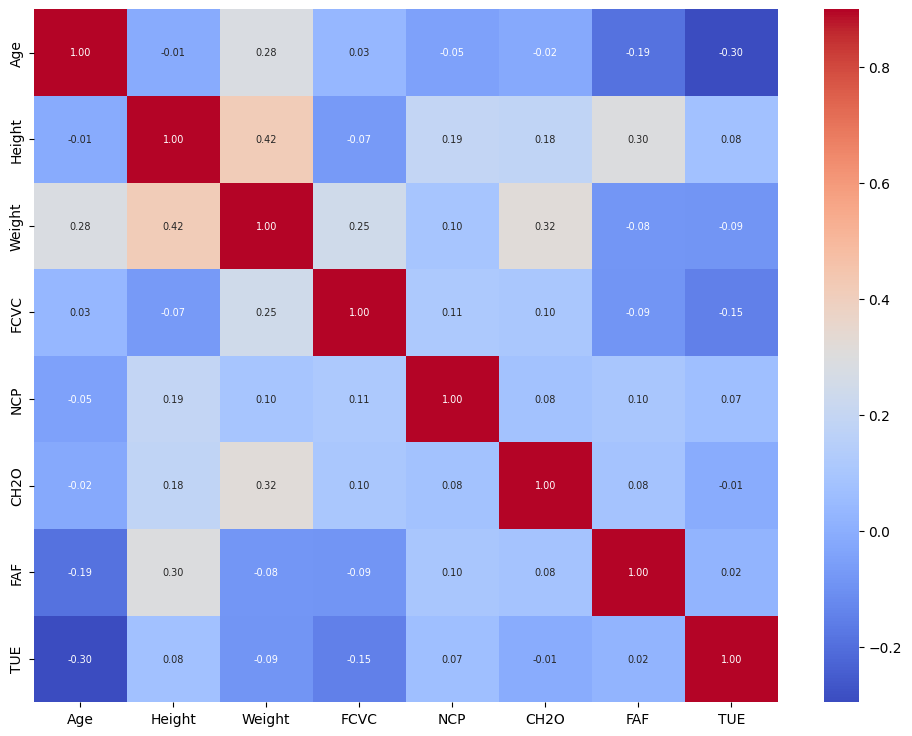

In [11]:
corrmat = train_set.select_dtypes(include=[np.number]).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 7})

In [20]:
for col in train_set.columns:
    if train_set[col].dtype == 'object' and col != 'NObeyesdad':  # Assurez-vous que la colonne est catégorielle et n'est pas la variable cible.
        contingency_table = pd.crosstab(train_set[col], train_set['NObeyesdad'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-squared test for {col}:")
        print(f"Chi-squared Statistic: {chi2}, p-value: {p}\n")


Chi-squared test for Gender:
Chi-squared Statistic: 7953.767544285371, p-value: 0.0

Chi-squared test for family_history_with_overweight:
Chi-squared Statistic: 6423.317090815157, p-value: 0.0

Chi-squared test for FAVC:
Chi-squared Statistic: 1553.6297505782907, p-value: 0.0

Chi-squared test for CAEC:
Chi-squared Statistic: 6897.329566047414, p-value: 0.0

Chi-squared test for SMOKE:
Chi-squared Statistic: 216.3006126923555, p-value: 6.396981747148517e-44

Chi-squared test for SCC:
Chi-squared Statistic: 1024.7984666527484, p-value: 3.8701029544793576e-218

Chi-squared test for CALC:
Chi-squared Statistic: 4013.082706081725, p-value: 0.0

Chi-squared test for MTRANS:
Chi-squared Statistic: 2349.082567778232, p-value: 0.0



In [17]:
contingency_table

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,277,309,747,944,0,475,782
Bike,2,14,2,1,0,9,4
Motorbike,4,17,4,3,0,7,3
Public_Transportation,2166,2565,2132,2294,4046,1835,1649
Walking,74,177,25,6,0,101,84
